## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_selector, ColumnTransformer
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from plotnine import ggplot, aes, geom_line, geom_abline, labs, coord_flip, theme, geom_bar
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.metrics import cohen_kappa_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df1 = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [62]:
X = df1[['age','chol']]
y = df1['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
)

lr = LogisticRegression()

my_lr_pipeline = Pipeline(
    [('preprocessing',ct),('Log',lr)]
)

fitted_lr_pipeline=my_lr_pipeline.fit(X, y)


feature_names = fitted_lr_pipeline.named_steps['preprocessing'].get_feature_names_out()
coefficients = fitted_lr_pipeline.named_steps['Log'].coef_

coefficients = coefficients[0]

lrcoef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
})
lrcoef_df['abs'] = abs(lrcoef_df['Coefficient'])
lrcoef_df=lrcoef_df.sort_values(by='abs', ascending=False)

In [64]:
lrinter = fitted_lr_pipeline.named_steps['Log'].intercept_
lrinter=lrinter[0]

In [65]:
lrcoef_df

,Variable,Coefficient,abs
0,remainder__age,0.046863,0.046863
1,remainder__chol,0.001801,0.001801


for a 55 year old, their cholesterol would have to be...

0 = 0.047*55 + 0.0018chol - 3.24

chol = 363.89

for the doctors to predict heart disease is present

In [14]:
z = np.log(0.9/0.1)
z

2.1972245773362196

2.197 = 0.047*55 + 0.0018chol - 3.24

chol = 1584.44

For the doctors to have 90% certainty heart disease is present

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
lda= LinearDiscriminantAnalysis()

my_lr_pipeline = Pipeline(
    [('preprocessing',ct),('LDA',lda)]
)

fitted_lr_pipeline=my_lr_pipeline.fit(X, y)


feature_names = fitted_lr_pipeline.named_steps['preprocessing'].get_feature_names_out()
coefficients = fitted_lr_pipeline.named_steps['LDA'].coef_

coefficients = coefficients[0]

ldcoef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
})
ldcoef_df['abs'] = abs(ldcoef_df['Coefficient'])
ldcoef_df=ldcoef_df.sort_values(by='abs', ascending=False)

In [67]:
ldcoef_df

,Variable,Coefficient,abs
0,remainder__age,0.046557,0.046557
1,remainder__chol,0.001790,0.001790


In [68]:
ldinter = fitted_lr_pipeline.named_steps['LDA'].intercept_
ldinter = ldinter[0]

for a 55 year old, their cholesterol would have to be...

0 = 0.0465*55 + 0.00179chol - 3.2197

chol = 369.94

for the doctors to predict heart disease is present

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [32]:
from sklearn.svm import SVC

sv = SVC(kernel='linear')

my_pipeline = Pipeline(
    [('preprocessing',ct),('SVC',sv)]
)

cs = {'SVC__C':[0.001,0.1,1, 5,10]}

gscv = GridSearchCV(my_pipeline, cs, cv = 5, scoring='roc_auc')

gscv_fitted = gscv.fit(X, y)

results = pd.DataFrame(data = {"neighbors": [0.001,0.1,1,5,10], "Scores": gscv_fitted.cv_results_['mean_test_score']})
results

,neighbors,Scores
0,0.001,0.633532
1,0.100,0.640381
2,1.000,0.641347
3,5.000,0.639898
4,10.000,0.613569


In [34]:
sv = SVC(C=1, kernel='linear')

my_pipeline = Pipeline(
    [('preprocessing',ct),('SVC',sv)]
)

fitted_pipeline=my_pipeline.fit(X, y)


feature_names = fitted_pipeline.named_steps['preprocessing'].get_feature_names_out()
coefficients = fitted_pipeline.named_steps['SVC'].coef_

coefficients = coefficients[0]

scoef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
})
scoef_df['abs'] = abs(scoef_df['Coefficient'])
scoef_df=scoef_df.sort_values(by='abs', ascending=False)

In [35]:
scoef_df

,Variable,Coefficient,abs
0,remainder__age,0.064398,0.064398
1,remainder__chol,0.003659,0.003659


In [37]:
sinter = fitted_pipeline.named_steps['SVC'].intercept_
sinter

array([-4.68603406])

In [41]:
sinter = sinter[0]

for a 55 year old, their cholesterol would have to be...

0 = 0.0644*55 + 0.00366chol - 4.686

chol = 312.56

for the doctors to predict heart disease is present

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [45]:
from plotnine import ggplot, geom_point, aes, labs, theme, geom_abline, annotate

In [55]:
new = df1[['age','chol','diagnosis']]

plot = (
    ggplot(new, aes(x='age', y='chol', color='factor(diagnosis)')) +
    geom_point() +
    labs(title='Scatter Plot of Age vs Cholesterol',
         x='Age',
         y='Cholesterol',
         color='Diagnosis') +
    theme(legend_title_align='center')
)


In [56]:
age_coef = scoef_df['Coefficient'].iloc[0]
chol_coef = scoef_df['Coefficient'].iloc[1]

# Adding the decision boundary to the existing plot
# The equation can be rearranged to chol = (-age_coef / chol_coef) * age - (sinter / chol_coef)
plot_with_svc = (
    plot +
    geom_abline(aes(slope=-age_coef/chol_coef, intercept=-sinter/chol_coef), color="black", linetype="dashed") +
    # Adding a label for the decision boundary
    annotate("text", x=40, y=550, label="SVC", color="black")
)


In [69]:
age_coef = lrcoef_df['Coefficient'].iloc[0]
chol_coef = lrcoef_df['Coefficient'].iloc[1]

plot_with_lr = (
    plot_with_svc +
    geom_abline(aes(slope=-age_coef/chol_coef, intercept=-lrinter/chol_coef), color="green", linetype="dashed") +
    # Adding a label for the decision boundary
    annotate("text", x=50, y=550, label="LR", color="green")
)


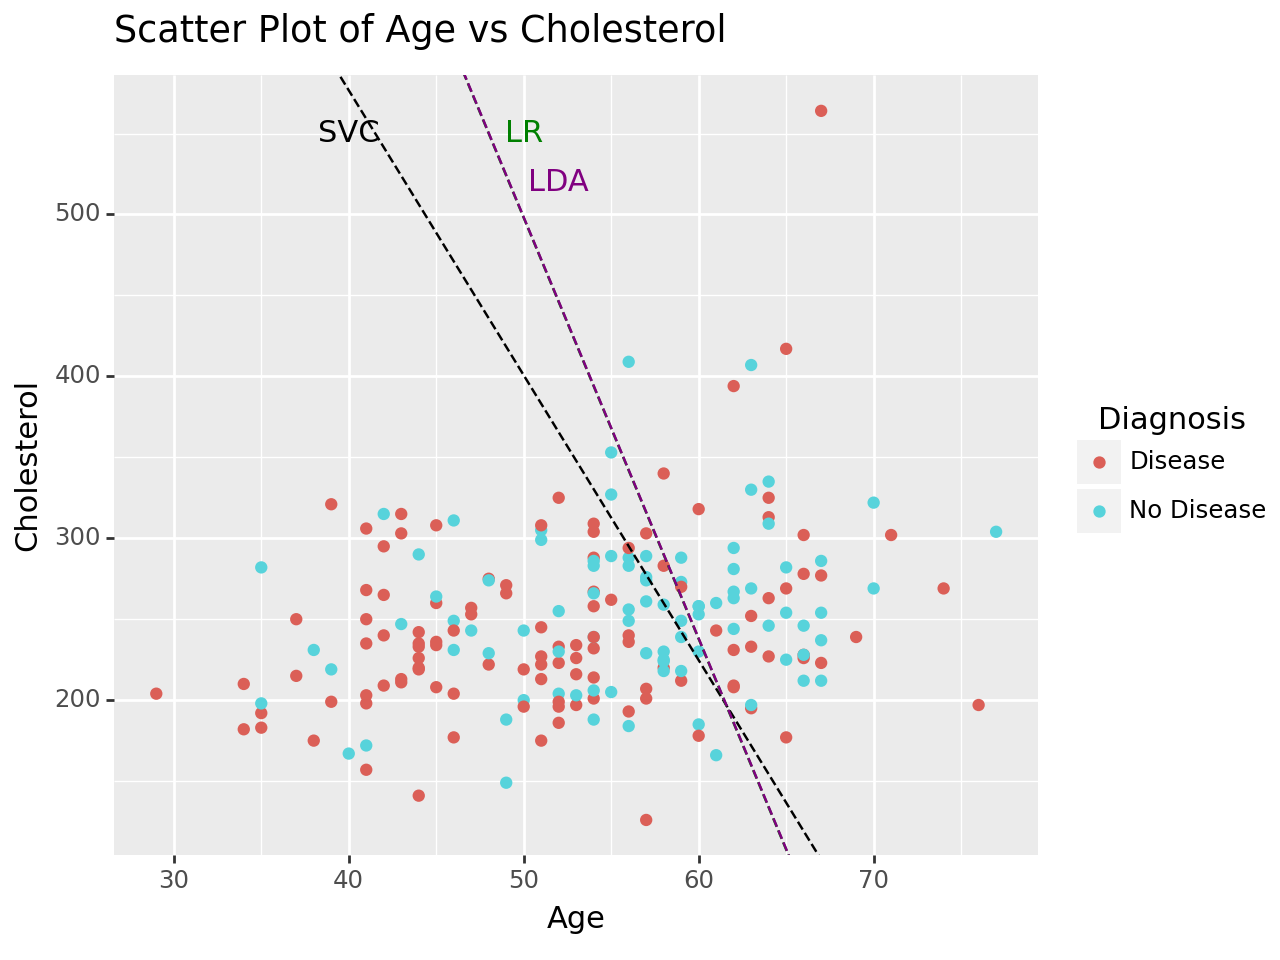

<Figure Size: (640 x 480)>

In [70]:
age_coef = ldcoef_df['Coefficient'].iloc[0]
chol_coef = ldcoef_df['Coefficient'].iloc[1]

plot_with_ld = (
    plot_with_lr +
    geom_abline(aes(slope=-age_coef/chol_coef, intercept=-ldinter/chol_coef), color="purple", linetype="dashed") +
    # Adding a label for the decision boundary
    annotate("text", x=52, y=520, label="LDA", color="purple")
)

plot_with_ld